# **Intoroduction**

The purpose of this code is to learn about a important application of Ai i.e Predictive maintenance. For this project I am going to take you to the process of getting the dataset right and also learning a thing about LSTM models. In this project we are going to use the dataset released by Nasa which is CMAPSS Jet Engine Simulated Data. The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. Read about it more from here: [Click me!](https://data.nasa.gov/Aerospace/CMAPSS-Jet-Engine-Simulated-Data/ff5v-kuh6/about_data). 

Now after downloading this dataaset we have to first preprocess the data and then make it ready for some action!

For some reference here is the image of that particular rocket.

<div style="width:100%;text-align: center;"><img src="https://i.postimg.cc/ZqdZ56mW/turbo-jet-engine-diagram.jpg" width="500px" height="500px"></div>

For this project our main foucs will be effeciently recording a low RUL value to prevent engine failure. Data analysis, Data visualization and LSTM will be used for this particular project. Now read the dataset using the code given below

In [1]:

import time
from tqdm import tqdm
import keras.models
import keras.layers
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import math
import xgboost

import warnings
warnings.simplefilter('ignore')

Now read the dataset using the code given below

In [2]:
trainingData = pd.read_csv("/Users/xyz/Desktop/Project/Dataset/train_FD001.txt",sep=" ",header=None)
testingData = pd.read_csv("/Users/xyz/Desktop/Project/Dataset/test_FD001.txt",sep=" ",header=None)
remaining_useful_life_data = pd.read_csv("/Users/xyz/Desktop/Project/Dataset/RUL_FD001.txt",sep=" ",header=None)

train_copy = trainingData
test_copy = testingData

In [3]:
trainingData

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [4]:
remaining_useful_life_data

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN
...,...,...
95,137,NaN
96,82,NaN
97,59,NaN
98,117,NaN


In [5]:
trainingData.drop(columns=[26,27],inplace=True)
testingData.drop(columns=[26,27],inplace=True)
remaining_useful_life_data.drop(columns=[1],inplace=True)

In [6]:
engineFeatures = ['unit_ID','cycles','setting_1','setting_2','setting_3','T2','T24','T30','T50','P2','P15','P30','Nf',
           'Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd','PCNfR_dmd','W31','W32' ]
trainingData.columns = engineFeatures
trainingData.describe()

,unit_ID,cycles,setting_1,setting_2,setting_3,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


In [7]:
# Define a function to calculate the remaining useful life (RUL)
def calculateRemainingUsefulLife(g):
    # Calculate the RUL as the difference between the maximum cycle value and the cycle value for each row
    g['RUL'] = max(g['cycles']) - g['cycles']
    return g

# Apply the add_rul function to the training data grouped by the unit ID
train = trainingData.groupby('unit_ID').apply(calculateRemainingUsefulLife)

In [8]:
train.head()

unit_ID  cycles  setting_1  setting_2  setting_3      T2     T24  \
unit_ID                                                                       
1       0        1       1    -0.0007    -0.0004      100.0  518.67  641.82   
        1        1       2     0.0019    -0.0003      100.0  518.67  642.15   
        2        1       3    -0.0043     0.0003      100.0  518.67  642.35   
        3        1       4     0.0007     0.0000      100.0  518.67  642.35   
        4        1       5    -0.0019    -0.0002      100.0  518.67  642.37   

               T30      T50     P2  ...      NRf      NRc     BPR  farB  \
unit_ID                             ...                                   
1       0  1589.70  1400.60  14.62  ...  2388.02  8138.62  8.4195  0.03   
        1  1591.82  1403.14  14.62  ...  2388.07  8131.49  8.4318  0.03   
        2  1587.99  1404.20  14.62  ...  2388.03  8133.23  8.4178  0.03   
        3  1582.79  1401.87  14.62  ...  2388.08  8133.83  8.3682  0.03   
        4  1582.85  1406.22  14.62  ...  2388.04  8133.80  8.4294  0.03   

           htBleed  Nf_dmd  PCNfR_dmd    W31      W32  RUL  
unit_ID                                                     
1       0      392    2388      100.0  39.06  23.4190  191  
        1      392    2388      100.0  39.00  23.4236  190  
        2      390    2388      100.0  38.95  23.3442  189  
        3      392    2388      100.0  38.88  23.3739  188  
        4      393    2388      100.0  38.90  23.4044  187  

[5 rows x 27 columns]

Let us find the standard Deviation of all the components for a clear picture

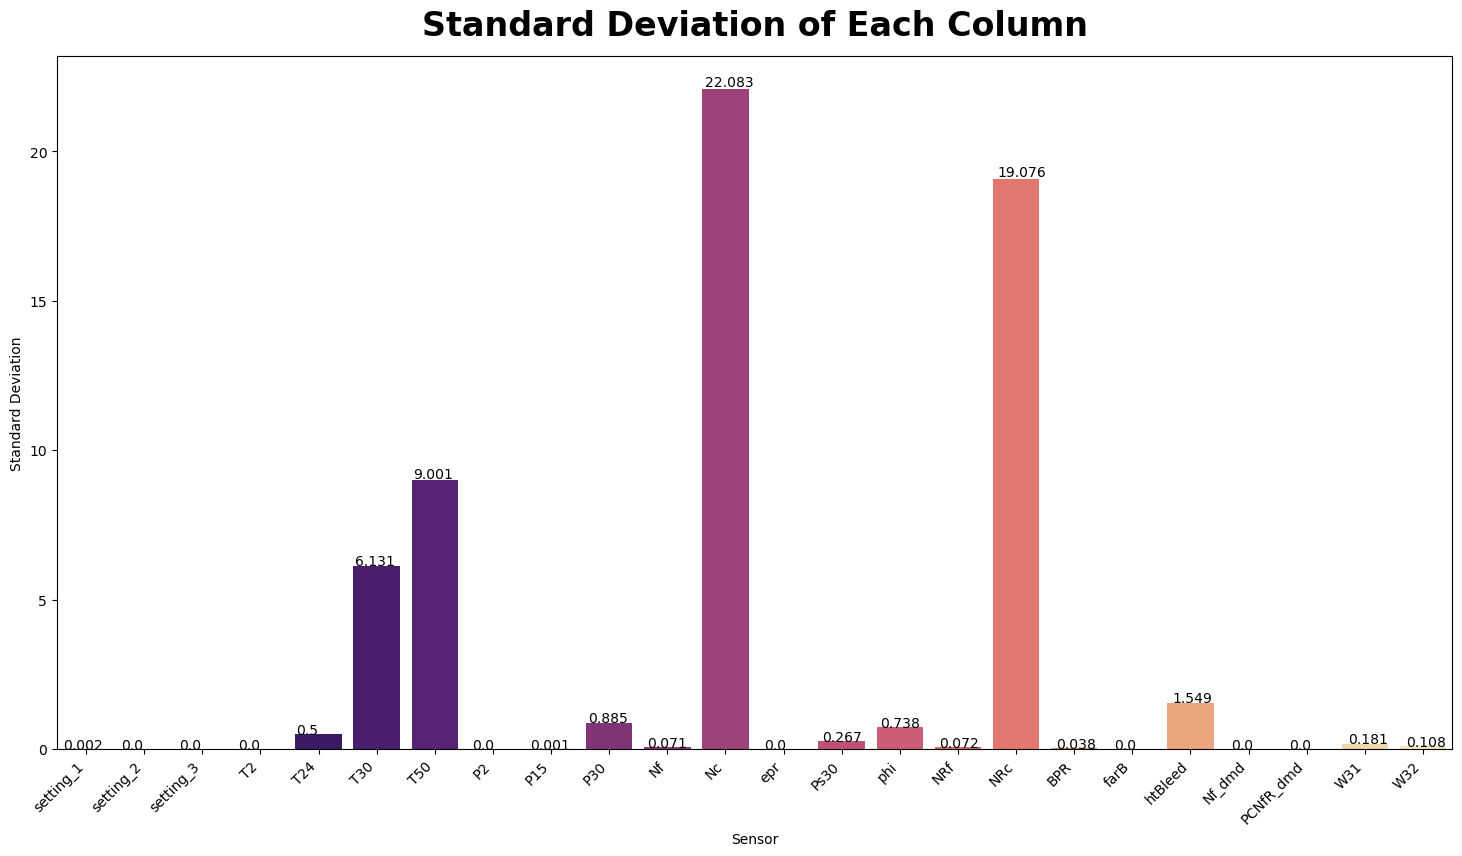

In [9]:
plt.figure(figsize=(18, 9))
statisticalSummary = trainingData.agg(['mean', 'std']).T[2:]
plotAxes = sns.barplot(x=statisticalSummary.index, y="std", data=statisticalSummary, palette='magma')
plotAxes.set_xticklabels(plotAxes.get_xticklabels(), rotation=45, ha="right")
plotAxes.set_xlabel("Sensor")
plotAxes.set_ylabel("Standard Deviation")
plotAxes.set_title("Standard Deviation of Each Column", fontweight='bold', fontsize=24, pad=15)

for p in plotAxes.patches:
    plotAxes.annotate(str(round(p.get_height(),3)), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

NC with a standard deviation of 22.083, this means that the values of this variable are widely spread out from the mean of the data. So lets remove the less significant data so that the model would be more efficient.

In [10]:
train.drop(columns=['Nf_dmd','PCNfR_dmd','P2','T2','setting_3','farB','epr'],inplace=True) 

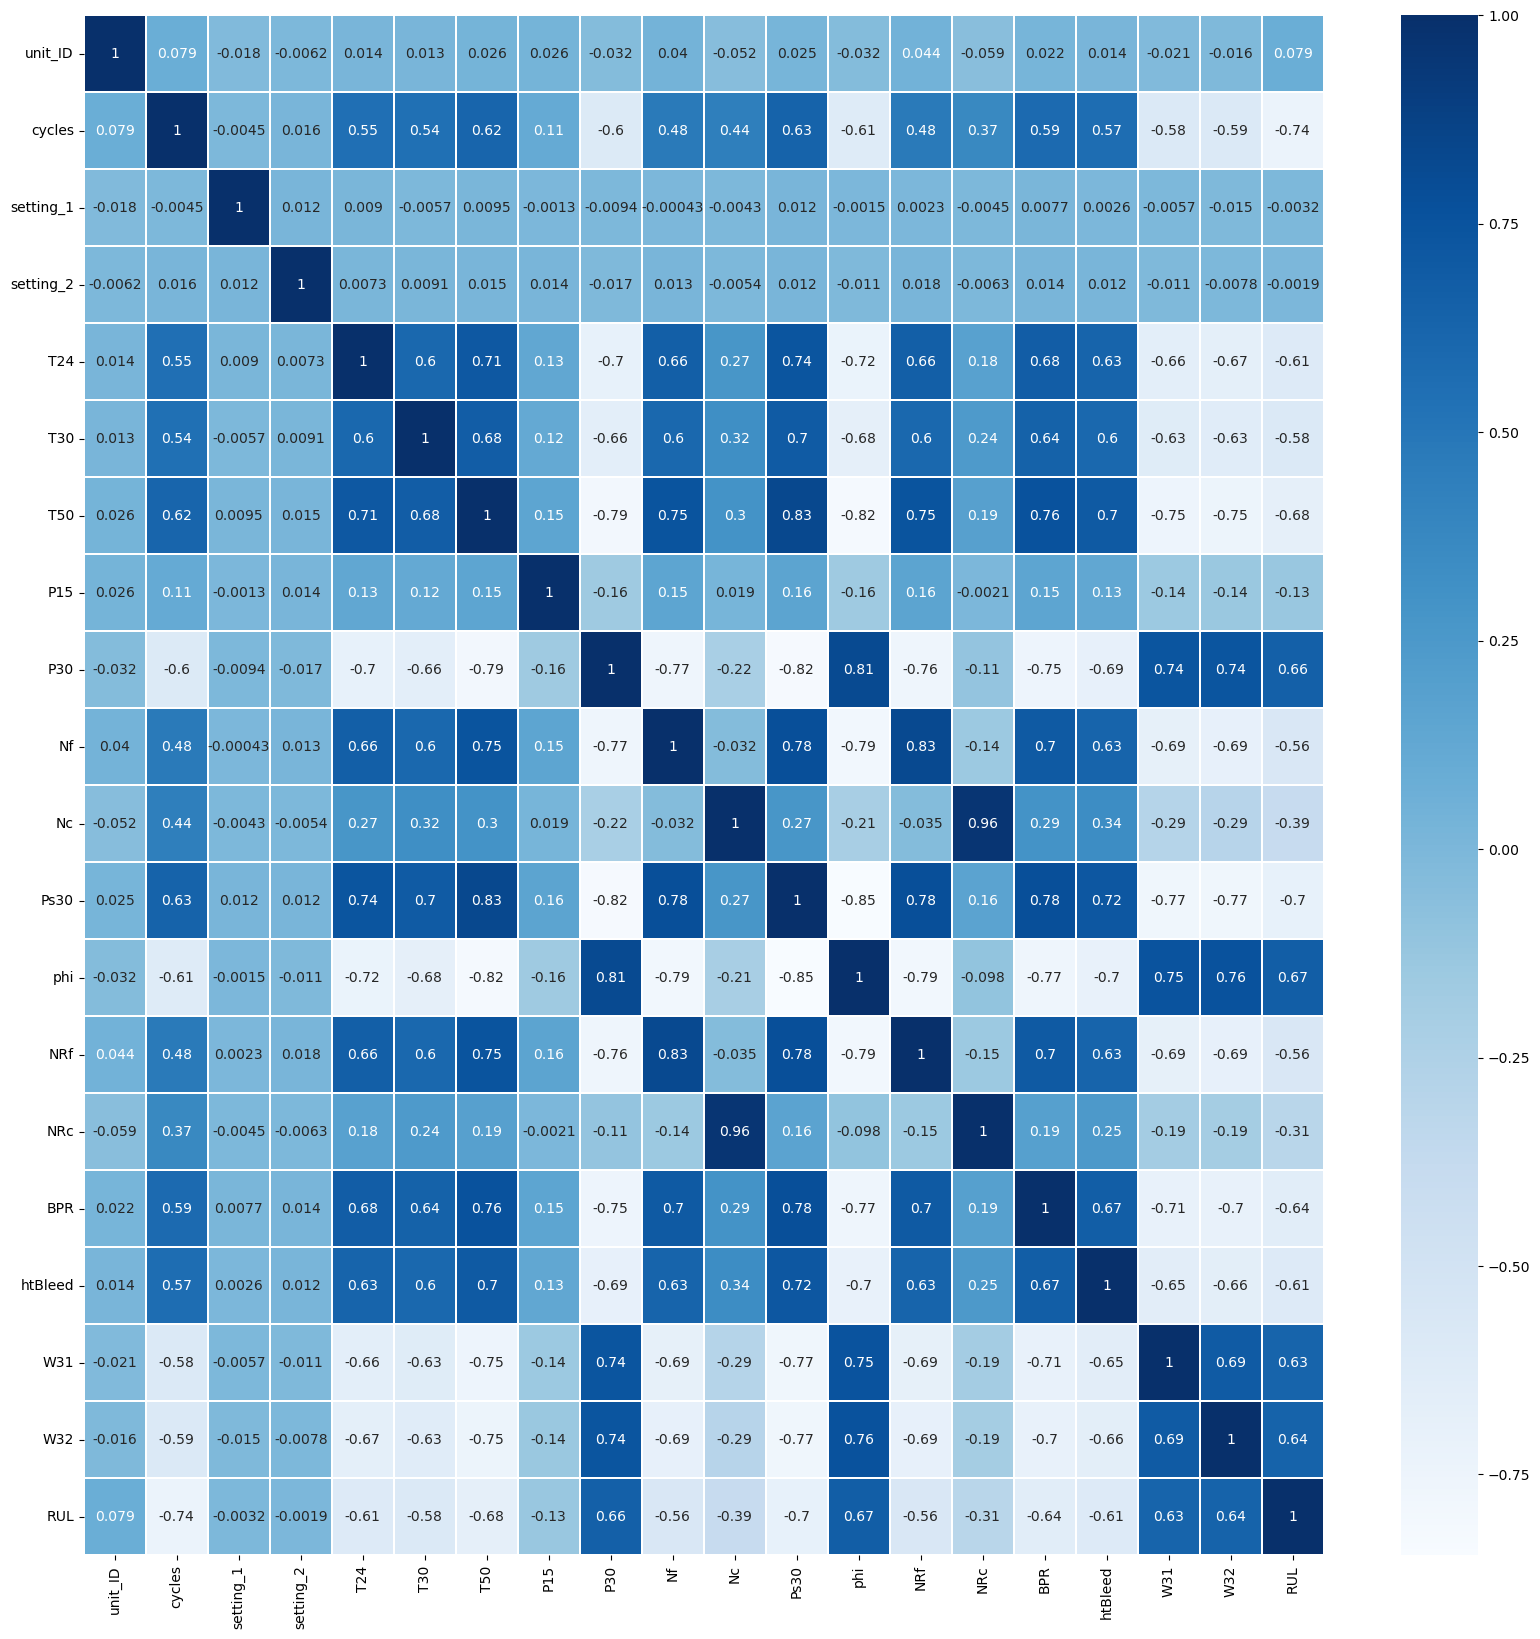

In [11]:
sns.heatmap(train.corr(),annot=True,cmap='Blues',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

The fuction given below takes the datalength and earlyrul as input and creates the target RUL. It returns an array that represents the remaining useful life (RUL) for each cycle in the input data. If the early_rul_duration is less than or equal to 0, then the target variable is a reversed range of data_length-1 to 0.

In [12]:
def generate_rul_sequence(data_length, early_rul = None):
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:
            return np.arange(data_length-1, -1, -1)
        else:
            return np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))

The function given below takes in input data and target data and processes them with a specified window length and shift size. The output_data is a numpy array with shape (num_batches, window_length, num_features). If target_data is not None, the function also outputs output_targets, a numpy array with shape (num_batches,) containing the target values for each batch.

In [13]:
def generateInputDataAndTargets(input_data, target_data = None, window_length = 1, shift = 1):
    num_batches = int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets

The function given below processes the test data for a single engine in preparation for making predictions using a trained model. It takes in the test data for a single engine (testdata_engine), the window_length and shift parameters that were used in preparing the training data, and the number of test windows (numberOfTestWindows) that should be worked on.

In [14]:
def prepareTestData(testdata_engine, window_length, shift, numberOfTestWindows = 1):
  
    max_num_test_batches = int(np.floor((len(testdata_engine) - window_length)/shift)) + 1
    if max_num_test_batches < numberOfTestWindows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = generateInputDataAndTargets(testdata_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length= window_length, shift = shift)
        return batched_test_data_for_an_engine, max_num_test_batches
    else:
        required_len = (numberOfTestWindows - 1) * shift + window_length
        batched_test_data_for_an_engine = generateInputDataAndTargets(testdata_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length= window_length, shift = shift)
        return batched_test_data_for_an_engine, numberOfTestWindows

The default option is to take only the last window of test data for each engine, which amounts to one window. However, if you set the number to a different value, that many windows from the last will be taken, and the final output will be the average of all the windows.

In [15]:
test_data = pd.read_csv("/Users/xyz/Desktop/Project/test_FD001.txt", sep = "\s+", header = None,names=engineFeatures )
true_rul = pd.read_csv("/Users/xyz/Desktop/Project/RUL_FD001.txt", sep = '\s+', header = None)

window_length = 30
shift = 1
early_rul = 125           
processed_train_data = []
processed_train_targets = []
numberOfTestWindows = 5     
processed_test_data = []
num_test_windows_list = []

columns_to_be_dropped =['unit_ID','setting_1','setting_2','setting_3', 'T2', 'P2','P15','P30', 'epr',
                 'farB', 'Nf_dmd', 'PCNfR_dmd']

train_data_first_column = trainingData ["unit_ID"]
test_data_first_column = test_data["unit_ID"]

Now we have to scale the data for all the engines as it is important to make the train and test data separately. So if we scale them to a particular no of engines then we would not have any concerns.

In [16]:
inputScaler = StandardScaler()
train_data = inputScaler.fit_transform(trainingData.drop(columns = columns_to_be_dropped))
test_data = inputScaler.transform(test_data.drop(columns = columns_to_be_dropped))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

train_machine_total = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

**Training data process:**

In [17]:
for i in np.arange(1, train_machine_total + 1):
    machine_train_data = train_data[train_data[0] == i].drop(columns = [0]).values
    
    # Determine whether it is possible to extract training data with the specified window length.
    if (len(machine_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
        
    temp_train_targets = generate_rul_sequence(data_length = machine_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = generateInputDataAndTargets(machine_train_data, temp_train_targets, 
                                                                                window_length= window_length, shift = shift)
    
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

**Test data process:**

In [20]:
for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values
    
    # Determine whether it is possible to extract test data with the specified window length.
    if (len(temp_test_data) < window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    
    # Prepare test data
    test_data_for_an_engine, num_windows = prepareTestData(temp_test_data, window_length=window_length, shift = shift,
                                                             numberOfTestWindows = numberOfTestWindows)
    
    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

In [21]:
print("Processed trianing data shape: ", processed_train_data.shape)
print("Processed training ruls shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed trianing data shape:  (17731, 30, 14)
Processed training ruls shape:  (17731,)
Processed test data shape:  (497, 30, 14)
True RUL shape:  (100,)


 The shape of processed_train_targets is (17731,), which means we have the corresponding target RUL values for the 17731 training samples.
 The shape of processed_train_data is (17731, 30, 14), which means we have 17731 engines, each with 30 time steps and 14 sensor readings at each time step.
The shape of processed_test_data is (497, 30, 14), which means we have 497 test or engines, each with 30 time steps and 14 sensor readings at each time step.
The shape of true_rul is (100,), which means we have the true RUL values for 100 test engines.

In [22]:
processed_train_data, processed_val_data, processed_train_targets, processed_val_targets = train_test_split(processed_train_data,
                                                                                                            processed_train_targets,
                                                                                                            test_size = 0.2,
                                                                                                            random_state = 83)
print("Processed train data shape: ", processed_train_data.shape)
print("Processed validation data shape: ", processed_val_data.shape)
print("Processed train targets shape: ", processed_train_targets.shape)
print("Processed validation targets shape: ", processed_val_targets.shape)

Processed train data shape:  (14184, 30, 14)
Processed validation data shape:  (3547, 30, 14)
Processed train targets shape:  (14184,)
Processed validation targets shape:  (3547,)


# **LSTM**

LSTM stands for long short-term memory models, used in the field of Deep Learning. It is a variety of recurrent neural networks (RNNs) that are capable of learning long-term dependencies, especially in sequence prediction problems. For this particular project we are going to use this model.

the function below creates a compiled model using the Keras Sequential API with the following architecture:

LSTM layer with 128 units, input shape of (window_length, 14), returns sequences and uses the hyperbolic tangent activation function.

LSTM layer with 64 units, returns sequences and uses the hyperbolic tangent activation function.

LSTM layer with 32 units, uses the hyperbolic tangent activation function.

Dense layer with 96 units and Rectified Linear Unit (ReLU) activation function.

Dense layer with 128 units and ReLU activation function. Dense layer with 1 unit.

The loss function used is mean squared error, and the optimizer used is with a learning rate of 0.001.

In [23]:
def initializeCompiledModel():
    model = Sequential([
        layers.LSTM(128, input_shape = (window_length, 14), return_sequences=True, activation = "tanh"),
        layers.LSTM(64, activation = "tanh", return_sequences = True),
        layers.LSTM(32, activation = "tanh"),
        layers.Dense(96, activation = "relu"),
        layers.Dense(128, activation = "relu"),
        layers.Dense(1)
    ])
    model.compile(loss = "mse", optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
    return model

rateAdjuster is a function that adjusts the learning rate during the training process, with the goal of improving the model's performance.
By adjusting the learning rate based on the epoch number, this fuction can help the model converge more quickly and accurately.

In [24]:
def rateAdjuster(epoch):
    if epoch < 5:
        return 0.001
    else:
        return 0.0001
callback = tf.keras.callbacks.LearningRateScheduler(rateAdjuster, verbose = 1)
model = initializeCompiledModel()
history = model.fit(processed_train_data, processed_train_targets, epochs = 50,
                    validation_data = (processed_val_data, processed_val_targets),
                    callbacks = callback,
                    batch_size = 128, verbose = 2)

2024-06-06 12:36:45.810492: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-06-06 12:36:45.810524: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-06 12:36:45.810539: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-06 12:36:45.810604: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-06 12:36:45.810627: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)



Epoch 1: LearningRateScheduler setting learning rate to 0.001.
Epoch 1/50


2024-06-06 12:36:48.511418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:36:48.823215: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:36:49.180727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:36:49.318580: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:36:50.874610: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:36:51.593747: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:36:51.785876: I tensorflow/core/grappler/optimizers/cust

111/111 - 9s - loss: 2966.2903 - val_loss: 678.6849 - lr: 0.0010 - 9s/epoch - 85ms/step

Epoch 2: LearningRateScheduler setting learning rate to 0.001.
Epoch 2/50
111/111 - 2s - loss: 464.1026 - val_loss: 314.3822 - lr: 0.0010 - 2s/epoch - 17ms/step

Epoch 3: LearningRateScheduler setting learning rate to 0.001.
Epoch 3/50
111/111 - 2s - loss: 290.4128 - val_loss: 242.9888 - lr: 0.0010 - 2s/epoch - 17ms/step

Epoch 4: LearningRateScheduler setting learning rate to 0.001.
Epoch 4/50
111/111 - 2s - loss: 208.0195 - val_loss: 170.3149 - lr: 0.0010 - 2s/epoch - 16ms/step

Epoch 5: LearningRateScheduler setting learning rate to 0.001.
Epoch 5/50
111/111 - 2s - loss: 173.2364 - val_loss: 158.5627 - lr: 0.0010 - 2s/epoch - 16ms/step

Epoch 6: LearningRateScheduler setting learning rate to 0.0001.
Epoch 6/50
111/111 - 2s - loss: 145.3197 - val_loss: 145.5824 - lr: 1.0000e-04 - 2s/epoch - 16ms/step

Epoch 7: LearningRateScheduler setting learning rate to 0.0001.
Epoch 7/50
111/111 - 2s - loss: 

Measure the difference between predicted and actual values.
RMSE = sqrt(1/n * Σ(actual_i - predicted_i)^2)

In [25]:
predicted_remaining_useful_life = model.predict(processed_test_data).reshape(-1)
individualEnginePredictions = np.split(predicted_remaining_useful_life, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows)) 
                             for ruls_for_each_engine, num_windows in zip(individualEnginePredictions, num_test_windows_list)]
                             
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE: ", RMSE)

2024-06-06 12:39:33.897204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:39:33.985348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:39:34.047514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-06-06 12:39:34.146661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


16/16 [==============================] - 2s 36ms/step
RMSE:  16.88616140789732


To compute the RMSE, we consider only the last example of each engine. Now let's see the difference if we take as a whole and take only the last engine

In [26]:
tf.keras.models.save_model(model, "FD001_LSTM_piecewise_RMSE_"+ str(np.round(RMSE, 4)) + ".h5")

indices_of_last_examples = np.cumsum(num_test_windows_list) - 1
preds_for_last_example = np.concatenate(individualEnginePredictions)[indices_of_last_examples]

RMSE_new = np.sqrt(mean_squared_error(true_rul, preds_for_last_example))
print("RMSE (Taking only last examples): ", RMSE_new)

RMSE (Taking only last examples):  17.00317284913275


A value of 17.003 indicates that the average deviation of the predictions from the actual values is around 17.003

rul_true and rul_pred should be 1D numpy arrays

In [27]:
def determine_s_score(rul_true, rul_pred):
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))
s_score = determine_s_score(true_rul, preds_for_last_example)
print("S-score: ", s_score)

S-score:  507.69925009896616


This is the measure of the difference between the actual and predicted RUL values normalized by the standard deviation of the RUL.

A higher S-score indicates a better prediction performance.

In general, an S-score of 458.1 indicates a good performance of the prediction model.

Now at last let's plot the graph such that we can see it viusally what we have worked on till now

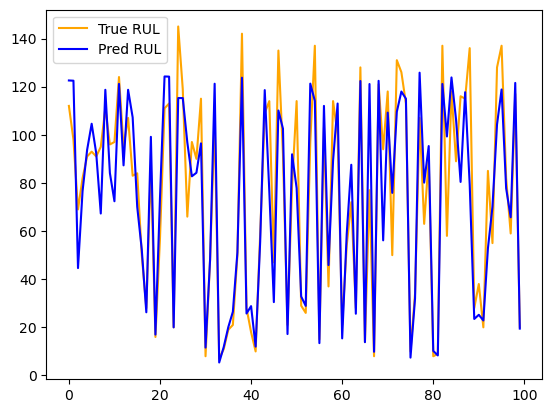

In [28]:
plt.plot(true_rul, label = "True RUL", color = "orange")
plt.plot(preds_for_last_example, label = "Pred RUL", color = "blue")
plt.legend()
plt.show()